## Without using the text data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('/content/smsspamcollection.tsv', sep='\t')
data.head

<bound method NDFrame.head of      label                                            message  length  punct
0      ham  Go until jurong point, crazy.. Available only ...     111      9
1      ham                      Ok lar... Joking wif u oni...      29      6
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155      6
3      ham  U dun say so early hor... U c already then say...      49      6
4      ham  Nah I don't think he goes to usf, he lives aro...      61      2
...    ...                                                ...     ...    ...
5567  spam  This is the 2nd time we have tried 2 contact u...     160      8
5568   ham               Will ü b going to esplanade fr home?      36      1
5569   ham  Pity, * was in mood for that. So...any other s...      57      7
5570   ham  The guy did some bitching but I acted like i'd...     125      1
5571   ham                         Rofl. Its true to its name      26      1

[5572 rows x 4 columns]>

In [5]:
data.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [7]:
data['label'].unique()

array(['ham', 'spam'], dtype=object)

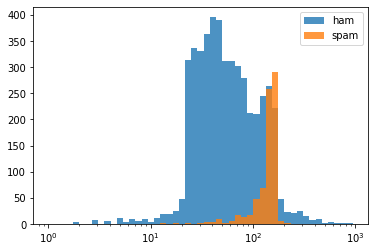

In [8]:
#visualize labels with respect to the length of the text
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(data[data['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(data[data['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

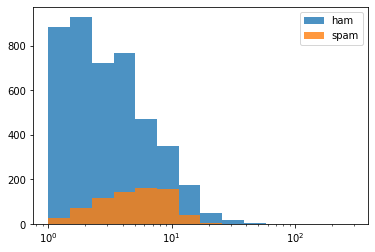

In [11]:
#visualize labels with respect to the punctuation
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(data[data['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(data[data['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [12]:
#create features

X = data[['length', 'punct']]
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
X_train.shape

(3733, 2)

In [16]:
X_test.shape

(1839, 2)

In [17]:
y_train.shape

(3733,)

In [18]:
# fit the model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_pred = logreg.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

0.843936922240348


In [22]:
df = pd.DataFrame(cm, index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,1547,46
spam,241,5


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.92      1593
        spam       0.10      0.02      0.03       246

    accuracy                           0.84      1839
   macro avg       0.48      0.50      0.47      1839
weighted avg       0.76      0.84      0.80      1839



In [26]:
#try a different model
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)


In [27]:
cm = confusion_matrix(y_test, y_pred_nb)
df = pd.DataFrame(cm, index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,1583,10
spam,246,0


In [28]:
print(accuracy_score(y_test, y_pred_nb))

0.8607939097335509


In [30]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.93      1593
        spam       0.00      0.00      0.00       246

    accuracy                           0.86      1839
   macro avg       0.43      0.50      0.46      1839
weighted avg       0.75      0.86      0.80      1839



In [32]:
# another model
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train,y_train)

y_pred_svc = svc.predict(X_test)

In [33]:
cm = confusion_matrix(y_test, y_pred_svc)
df = pd.DataFrame(cm, index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,1515,78
spam,131,115


In [34]:
print(accuracy_score(y_test, y_pred_svc))

0.8863512778684067


In [35]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.94      1593
        spam       0.60      0.47      0.52       246

    accuracy                           0.89      1839
   macro avg       0.76      0.71      0.73      1839
weighted avg       0.88      0.89      0.88      1839



## With using text Extraction
In the previous code we didn't use the text messages and hence didn't get very helpful results. Therefore the text needs to go through a Vectorizer that converts them to vectors so the machine learning model can easily understand them

### Text Extraction from scratch
Although sklearn does this for us, this is a general implementation of how things happen in the backend. Again, sklearn does some better and efficient calculation. This is just the basic one that includes
1. creating a vocab/dictionary for our text
2. creating a frequency vector

In [36]:
%%writefile sample1.txt
I really think swanlake is one of the best works of Tchaikowsky

Writing sample1.txt


In [38]:
%%writefile sample2.txt
But I also think that swanlake being so diverse with orchestra sounds a bit too simple on a piano

Overwriting sample2.txt


### Building the vocabulary

In [40]:
# assigning a code to every word in the text file

vocab = {}
i = 1

with open('/content/sample1.txt') as f:
    x = f.read().lower().split()

for word in x:
    if word in vocab:
        continue
    else:
        vocab[word]=i
        i+=1

print(vocab)


{'i': 1, 'really': 2, 'think': 3, 'swanlake': 4, 'is': 5, 'one': 6, 'of': 7, 'the': 8, 'best': 9, 'works': 10, 'tchaikowsky': 11}


In [41]:
with open('/content/sample2.txt') as f:
    x = f.read().lower().split()

for word in x:
    if word in vocab:
        continue
    else:
        vocab[word]=i
        i+=1

print(vocab)

{'i': 1, 'really': 2, 'think': 3, 'swanlake': 4, 'is': 5, 'one': 6, 'of': 7, 'the': 8, 'best': 9, 'works': 10, 'tchaikowsky': 11, 'but': 12, 'also': 13, 'that': 14, 'being': 15, 'so': 16, 'diverse': 17, 'with': 18, 'orchestra': 19, 'sounds': 20, 'a': 21, 'bit': 22, 'too': 23, 'simple': 24, 'on': 25, 'piano': 26}


### Feature Extraction

In [43]:
#create an empty vector for each word in the dictionary
fileone = ['/content/sample1.txt']+[0]*len(vocab)
fileone

['/content/sample1.txt',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [44]:
# map the frequencies of each word in sample1.txt to our vector:
with open('/content/sample1.txt') as f:
    x = f.read().lower().split()
    
for word in x:
    fileone[vocab[word]]+=1
    
fileone

['/content/sample1.txt',
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [46]:
# do the same for the second doc
filetwo = ['/content/sample2.txt']+[0]*len(vocab)

with open('/content/sample2.txt') as f:
    x = f.read().lower().split()
    
for word in x:
    filetwo[vocab[word]]+=1

filetwo

['/content/sample2.txt',
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1]

In [47]:
# compare the two vectors
print(f'{fileone}\n{filetwo}')

['/content/sample1.txt', 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['/content/sample2.txt', 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1]


## Using sklearn

In [48]:
X = data['message']
y = data['label']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(3733, 7082)

In [52]:
#using tfidf fits an estimator to the data and then transforms our count-matrix to a tf-idf representation.
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(3733, 7082)

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)
X_train_tfidf.shape

(3733, 7082)

In [54]:
#train classifier
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [55]:
# rather than doing all the above steps from train and test split seperately, they can be done in a pipeline
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

In [56]:
y_pred = text_clf.predict(X_test)

In [58]:
print(confusion_matrix(y_test,y_pred))

[[1586    7]
 [  12  234]]


In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1593
        spam       0.97      0.95      0.96       246

    accuracy                           0.99      1839
   macro avg       0.98      0.97      0.98      1839
weighted avg       0.99      0.99      0.99      1839



In [60]:
print(accuracy_score(y_test,y_pred))

0.989668297988037
